In [62]:
import pandas as pd
import json
import os

files = os.listdir("results")

json_files = {}
for file in files:
    with open("results/"+file, "r") as f:
        df = pd.DataFrame(json.load(f))
        idx = file.split("_")[1][3:]
        df["idx"] = int(idx)
        json_files[file] = df

df = pd.concat(json_files.values(), axis = 0)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx
0,"[0, 0, 593]",0.7608,class_token,-0.000760,0.000760,0
1,"[0, 0, 67]",0.7608,class_token,-0.000703,0.000703,0
2,"[0, 0, 690]",0.7608,class_token,-0.000758,0.000758,0
3,"[0, 0, 418]",0.7608,class_token,-0.000655,0.000655,0
4,"[0, 0, 583]",0.7608,class_token,-0.000602,0.000602,0
...,...,...,...,...,...,...
1515,[629],0.7608,heads.head.bias,-0.010798,-0.172764,6
1516,[64],0.7608,heads.head.bias,-0.012882,-0.206115,6
1517,[105],0.7608,heads.head.bias,-0.028462,-0.455388,6
1518,[175],0.7608,heads.head.bias,-0.051129,-0.818071,6


In [63]:
df.dtypes

tensor_location     object
criterion_score    float64
layer_name          object
value_before       float64
value_after        float64
idx                  int64
dtype: object

In [64]:
df['tensor_location'] = df['tensor_location'].astype(str).astype('|S') # which will by default set the length to the max len it encounters
df['layer_name'] = df['layer_name'].astype('|S') # which will by default set the length to the max len it encounters
df['idx'] = df['idx'].astype('|S') # which will by default set the length to the max len it encounters
df.dtypes

tensor_location       |S16
criterion_score    float64
layer_name            |S62
value_before       float64
value_after        float64
idx                   |S21
dtype: object

In [65]:
df = df.sort_values(by = ["layer_name", "idx", "tensor_location", "criterion_score"]).reset_index(drop = True)
df

,tensor_location,criterion_score,layer_name,value_before,value_after,idx
0,"b'[0, 0, 107]'",0.7608,b'class_token',0.010280,-0.010280,b'0'
1,"b'[0, 0, 123]'",0.7608,b'class_token',-0.000993,0.000993,b'0'
2,"b'[0, 0, 179]'",0.7610,b'class_token',0.003212,-0.003212,b'0'
3,"b'[0, 0, 198]'",0.7604,b'class_token',-0.015244,0.015244,b'0'
4,"b'[0, 0, 20]'",0.7608,b'class_token',-0.000803,0.000803,b'0'
...,...,...,...,...,...,...
36627,"b'[72, 427]'",0.7608,b'heads.head.weight',0.004210,0.000263,b'6'
36628,"b'[81, 527]'",0.7608,b'heads.head.weight',-0.014841,-0.237464,b'6'
36629,"b'[838, 544]'",0.7610,b'heads.head.weight',0.025741,0.411856,b'6'
36630,"b'[868, 656]'",0.7608,b'heads.head.weight',-0.003590,-0.000224,b'6'


<Axes: xlabel='idx', ylabel='criterion_score'>

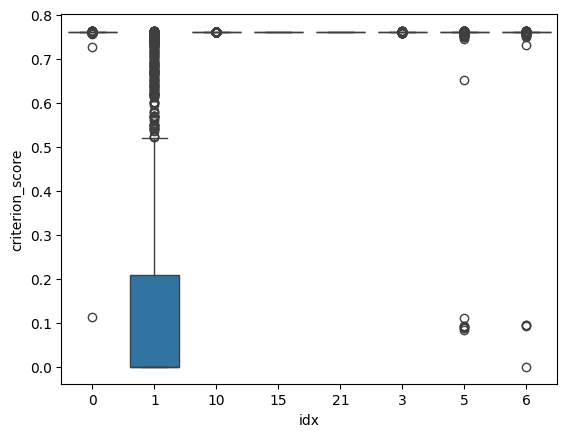

In [66]:
import seaborn as sns

sns.boxplot(data = df, x = "idx", y = "criterion_score")

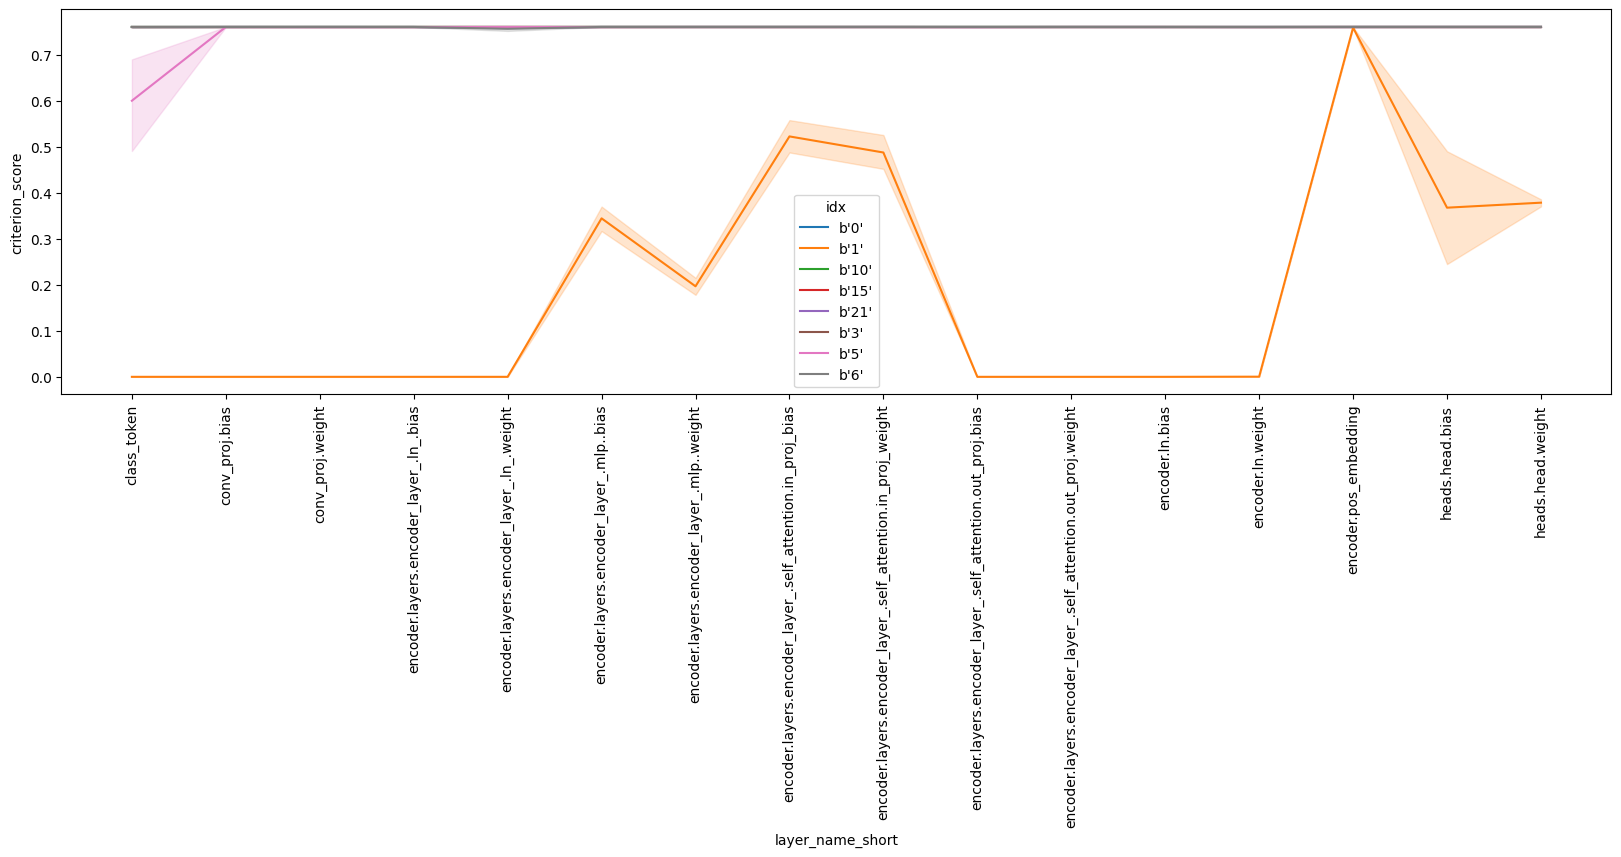

In [74]:
import matplotlib.pyplot as plt

df["layer_name_short"] = df["layer_name"].apply(lambda x: x.decode() if isinstance(x, bytes) else x).str.replace(r'\d+', '', regex=True)


plt.figure(figsize=(20,5))
sns.lineplot(data = df, x = "layer_name_short", y = "criterion_score", hue = "idx")
plt.xticks(rotation = 90)
plt.show()

In [61]:
df["idx"].value_counts()

idx
1     4712
0     4560
3     4560
5     4560
6     4560
10    4560
15    4560
21    4560
Name: count, dtype: int64

In [ ]:
import numpy as np
import struct


def bitflip_float32(x, bit_i=np.random.randint(0, 32)):

    if hasattr(x, "__iter__"):
        x_ = np.zeros_like(x, dtype=np.float32)
        for i, item in enumerate(x):
            string = list(float32_to_binary(item))
            string[bit_i] = "0" if string[bit_i] == "1" else "1"
            x_[i] = binary_to_float32("".join(string))
    else:
        string = list(float32_to_binary(x))
        string[bit_i] = "0" if string[bit_i] == "1" else "1"
        x_ = binary_to_float32("".join(string))

    return x_


def float32_to_binary(f):
    # Pack float into 4 bytes, then unpack as a 32-bit integer
    [bits] = struct.unpack("!I", struct.pack("!f", f))
    # Format the integer as a 32-bit binary string
    return f"{bits:032b}"


def binary_to_float32(binary_str):
    # Convert binary string to a 32-bit integer
    bits = int(binary_str, 2)
    # Pack the integer into bytes, then unpack as a float
    return struct.unpack("!f", struct.pack("!I", bits))[0]


n = 1000

